# **AULA PRÁTICA:**
# Alinhamento e Filogenia

# Google Colab

O **Google Colab ou Google Colaboratory** é uma plataforma baseada em nuvem hospedada pelo Google Research que permite para qualquer pessoa escrever e executar código Python em um ambiente de caderno (notebook) através do navegador.

Uma característica importante é que o Colab não requer configuração para uso, ao mesmo tempo em que fornece acesso gratuito a recursos de computação, incluindo GPUs, para incentivar pesquisas em aprendizagem de máquina, análise de dados e educação.

No Google Colab, você também pode executar **comandos Bash** diretamente nas células do notebook adicionando um ponto de exclamação (!) antes do comando, como exemplo o uso do 'ls' para listar diretórios: `!ls`. Como exceção do uso da exclamação, para mudar o diretório utilizando comando Bash, deve-se adicionar o sinal de porcentagem (%) antes do comando 'cd': `%cd`.

Para executar múltiplas linhas de comando Bash em sequência, você pode utilizar células de código com o comando '%%bash' no início, permitindo que você escreva um script Bash diretamente na célula:

```
%%bash

cd $HOME/analysis
cat text.csv | awk -F, '{print $2}' > text2.csv
```

# Conda/Mamba

O **Conda** é um sistema de gerenciamento de pacotes e ambientes que permite a instalação, execução e atualização de pacotes, sendo amplamente utilizado na comunidade científica e de análise de dados para gerenciar bibliotecas e ambientes isolados de Python e R.

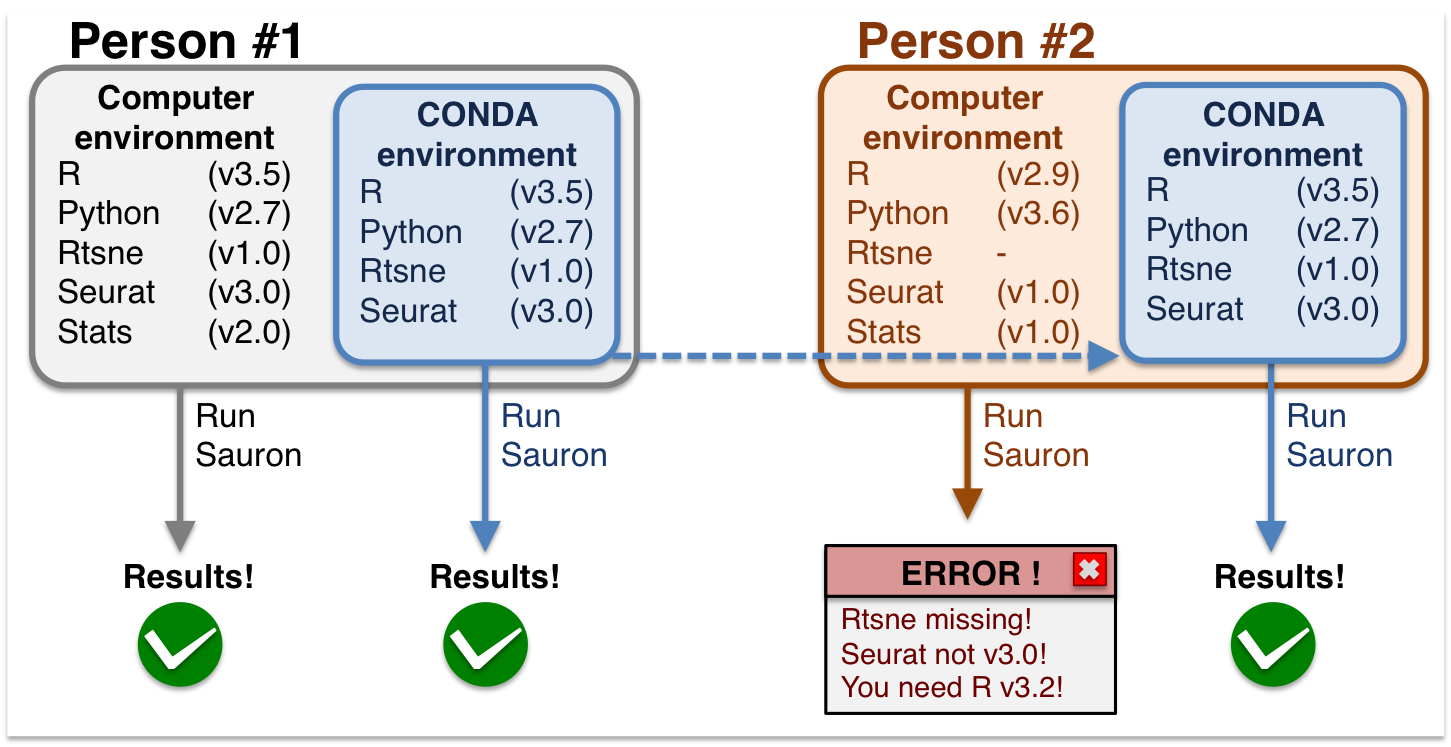

O **Mamba** e **Micromamba** são implementações mais rápidas e leves do Conda, com o Mamba sendo uma versão completa enquanto o Micromamba é uma versão minimalista, ambos projetados para oferecer melhor desempenho e eficiência na resolução de pacotes e na criação de ambientes, especialmente em sistemas com recursos limitados.

# Salvar uma cópia do notebook da aula prática

Antes de continuar, vamos **salvar uma cópia deste notebook** no Google Drive:

1. Clique em `Arquivo`, no canto superior esquerdo (em inglês, `File`).
2. Selecione `Salvar uma cópia no Drive` (em inglês `Save a copy in Drive`).

# Execução das linhas de comando

In [ ]:
# Checar a versão do Python instalada na máquina virtual do Google Colab

!python --version

In [ ]:
# Instalar o Conda/Mamba utilizando o instalador de bibliotecas do Python (pip)

!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
# Listar ambientes existentes do Conda/Mamba

!mamba env list

In [ ]:
# Criar ambiente "filo" para análises de filogenia

!mamba create -n filo

In [ ]:
# Listar ambientes existentes do Conda/Mamba

!mamba env list

In [ ]:
# Ativar ambiente "filo"

!mamba activate filo

In [ ]:
# Instalar mafft e iqtree no ambiente "filo"

!mamba install -c bioconda mafft iqtree

In [ ]:
# Listar pacotes existentes no ambiente "filo"

!mamba list

In [ ]:
# Rodar alinhamento

FASTA="DENV"

!mafft --thread $(nproc) --auto --6merpair --leavegappyregion "$FASTA".fasta >> "$FASTA"-aln.fasta

from google.colab import files
files.download(f'{FASTA}-aln.fasta')

In [ ]:
# Rodar filogenia

FASTA="DENV"

!iqtree -nt AUTO -s "$FASTA"-aln.fasta -B 1000

from google.colab import files
files.download(f'{FASTA}-aln.fasta.contree')